# Project 911 Calls
For this capstone project we will be analyzing some 911 call data from Kaggle. 

# Data And Setup

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib as pl

In [5]:
df911=pd.read_csv('911.csv')

In [6]:
df911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


some Information about df911

# Basic Questions

#What are the top 5 zipcodes for 911 calls? 

In [7]:
df911['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#What are the top 5 townships (twp) for 911 calls?

In [8]:
df911['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#Take a look at the 'title' column, how many unique title codes are there?

In [9]:
df911['title'].nunique()

110

# CreatingNewFeatures

In the titles column there are "Reasons/Departments" specified before the title code.These are EMS, Fire, and Traffic.
Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

In [10]:
df911['Reason']=df911['title'].apply(lambda x: x.split(':')[0])

#What is the most common Reason for a 911 call based off of this new column? 

In [11]:
df911['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

#and we can find out common reason by .idxmax

In [13]:
df911['Reason'].value_counts().idxmax()

'EMS'

#Now use seaborn to create a countplot of 911 calls by Reason. 

D:\anacondainstalled\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reason', ylabel='count'>

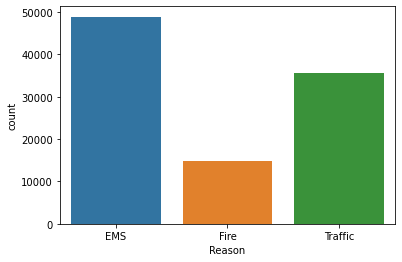

In [15]:
import seaborn as sns
sns.countplot(df911['Reason'])

#in order to dispel warning,we write above command as following
#I just wanted to see difference between 2 syntax and check that can be correct another ?

<AxesSubplot:xlabel='Reason', ylabel='count'>

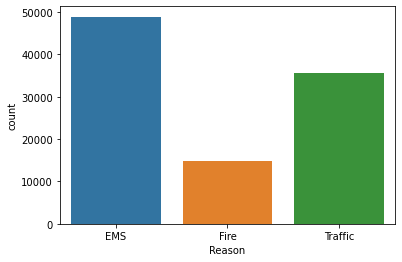

In [16]:
sns.countplot(data=df911,x='Reason')

#Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? 

In [17]:
type(df911['timeStamp'].iloc[0])

str

You should have seen that these timestamps are still strings.
Use pd.to_datetime to convert the column from strings to DateTime objects.

In [19]:
df911['timeStamp']=pd.to_datetime(df911['timeStamp'])

We can use Jupyter's tab method to explore the various attributes you can call. 
Now that the timestamp column are actually DateTime objects,
use .apply() to create 3 new columns called Hour, Month, and Day of Week.
We will create these columns based off of the timeStamp column.

In [21]:
df911['Month']=df911['timeStamp'].apply(lambda x: x.month)
df911['DayOfWeek']=df911['timeStamp'].apply(lambda x: x.dayofweek)
df911['Hour']=df911['timeStamp'].apply(lambda x: x.hour)

#mapping days on digits 0 till 6 ,by define dict:

In [20]:
dmap={0:'monday',1:'teuseday',2:'wednesday',3:'thursday',4:'friday',5:'saturday',6:'sunday'}

In [22]:
df911['DayOfWeek']=list(map(lambda x: dmap[x],df911['DayOfWeek']))

#Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. 

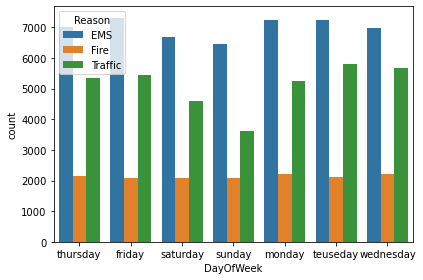

In [23]:
sns.countplot(data=df911,x='DayOfWeek',hue='Reason')
import matplotlib.pyplot as plt
plt.tight_layout()

<AxesSubplot:xlabel='Month', ylabel='count'>

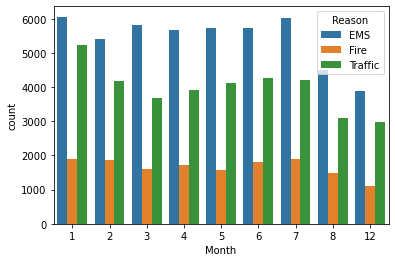

In [24]:
sns.countplot(data=df911,x='Month',hue='Reason')

Did you notice something strange about the above Plot?
some of Monthes missed?!

Now create a gropuby object called byMonth,
where you group the DataFrame by the month column and use the count() method for aggregation.
Use the head() method on this returned DataFrame.

In [25]:
byMonth=df911.groupby('Month').count()

In [26]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,DayOfWeek,Hour
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Now create a simple plot off of the dataframe indicating the count of calls per month

<AxesSubplot:xlabel='Month'>

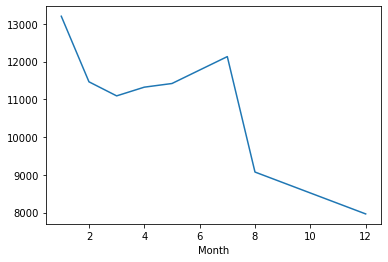

In [28]:
byMonth['twp'].plot()

Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month.
Keep in mind you may need to reset the index to a column.

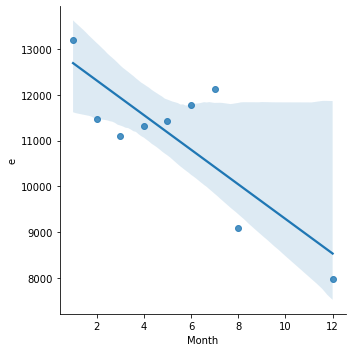

In [277]:
byMonth.reset_index()
sns.lmplot(data=byMonth.reset_index(),x='Month',y='e')#y=each column

Create a new column called 'Date' that contains the date from the timeStamp column. 
You'll need to use apply along with the .date() method.

In [30]:
df911['Date']=df911['timeStamp'].apply(lambda x: x.date())

Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

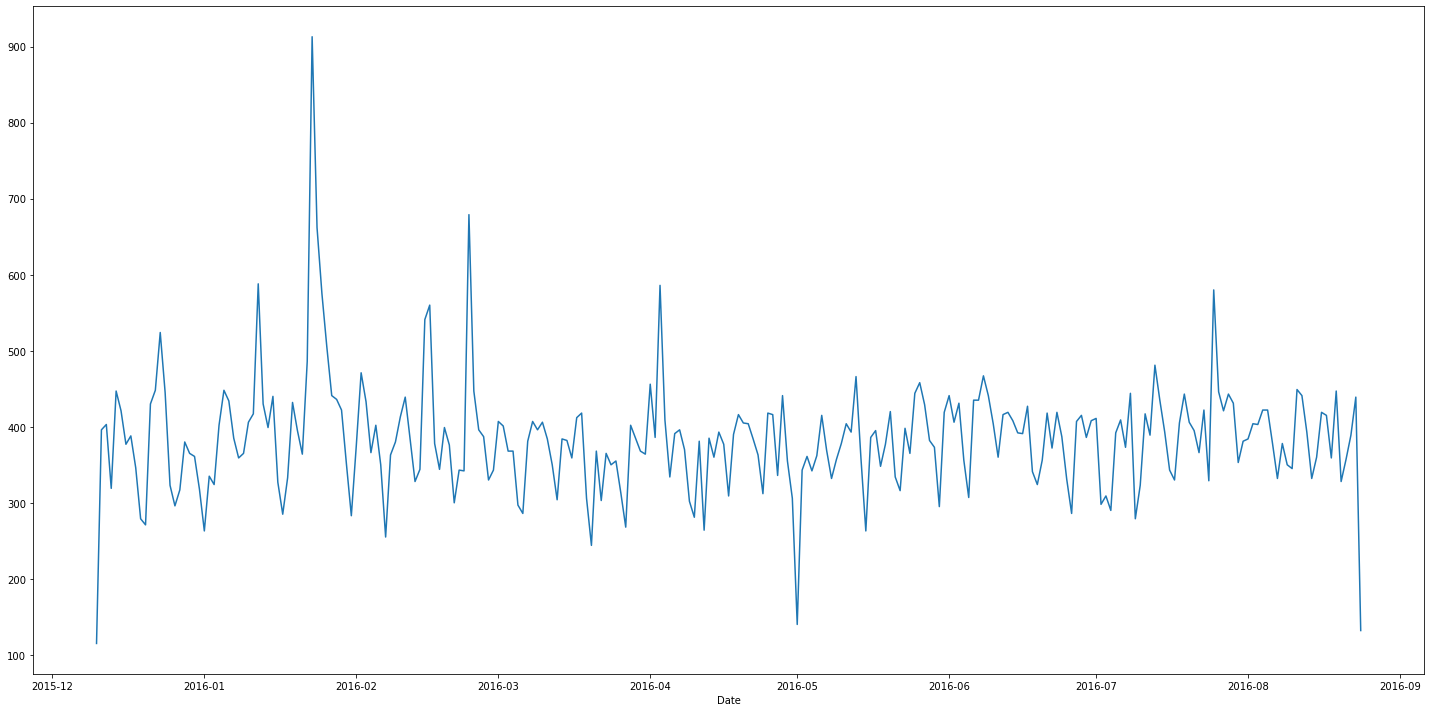

In [31]:
DateGr=df911.groupby('Date').count()
DateGr['lat'].plot(kind='line',figsize=(20,10))
plt.tight_layout()#for adjusting coordinates

Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

In [33]:
EMSreasonCals=df911[df911['Reason']=='EMS']
TrafficReasonCalls=df911[df911['Reason']=='Traffic']
FirereasonCalls=df911[df911['Reason']=='Fire']

In [34]:
CountCallsEMS=EMSreasonCals.groupby('Date').count()
CountCallsTraffic=TrafficReasonCalls.groupby('Date').count()
CountCallsFire=FirereasonCalls.groupby('Date').count()

<AxesSubplot:xlabel='Date'>

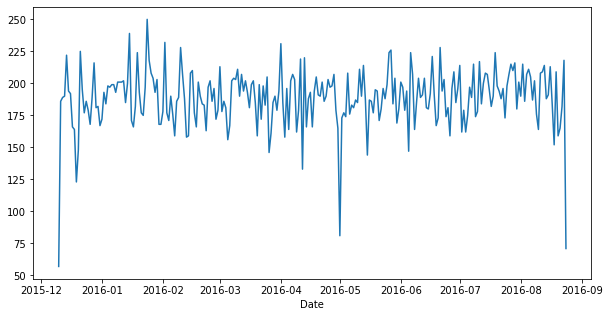

In [35]:
CountCallsEMS['twp'].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

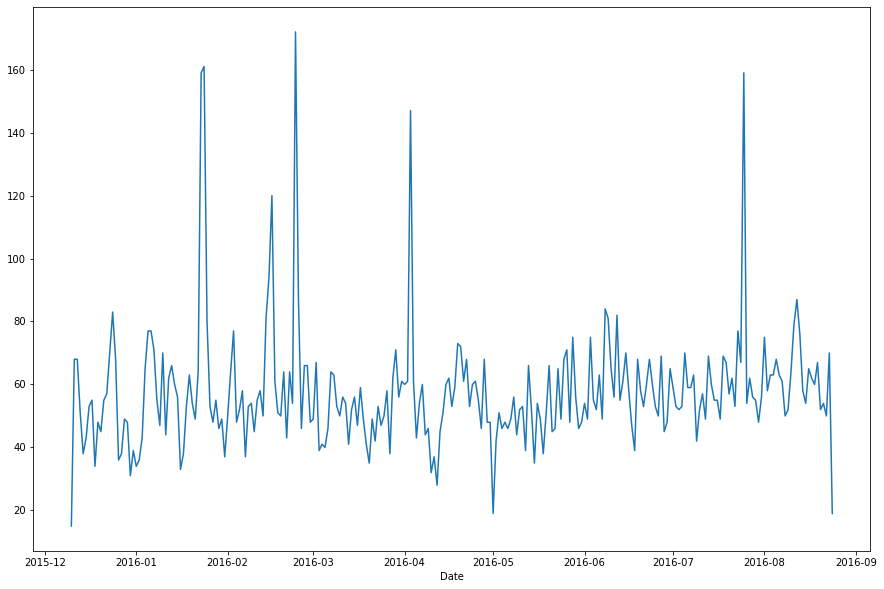

In [36]:
CountCallsFire['twp'].plot(figsize=(15,10))

<AxesSubplot:xlabel='Date'>

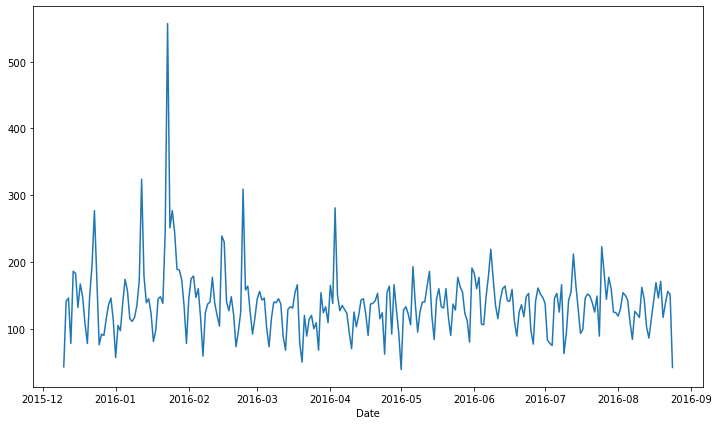

In [37]:
CountCallsTraffic['twp'].plot(figsize=(12,7))

Now let's move on to creating heatmaps with seaborn and our data.
We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [38]:
dayhour=df911.groupby(by=['DayOfWeek','Hour']).count()['lat'].unstack()

Now create a HeatMap using this new DataFrame.

<AxesSubplot:xlabel='Hour', ylabel='DayOfWeek'>

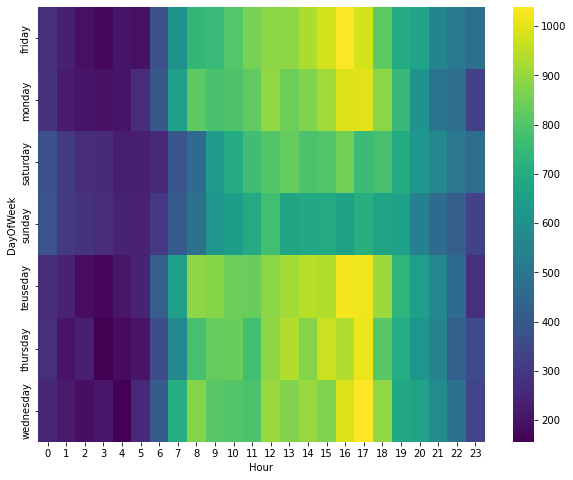

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(dayhour,cmap='viridis')

Now create a clustermap using this DataFrame.

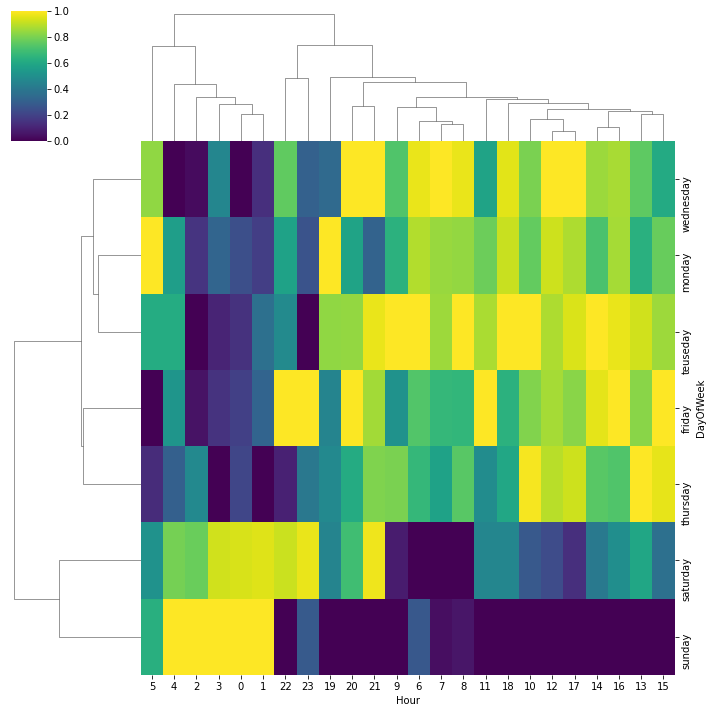

In [41]:
sns.clustermap(dayhour,cmap='viridis',standard_scale=True)

Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. 

<AxesSubplot:xlabel='Month', ylabel='DayOfWeek'>

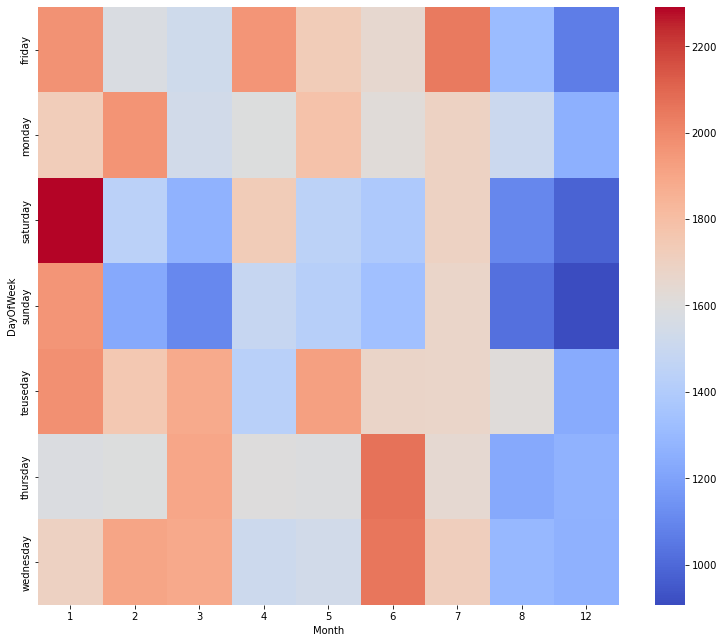

In [387]:
daymonth=df911.groupby(by=['DayOfWeek','Month']).count()['Reason'].unstack()
plt.figure(figsize=(13,11))
sns.heatmap(daymonth,cmap='coolwarm')

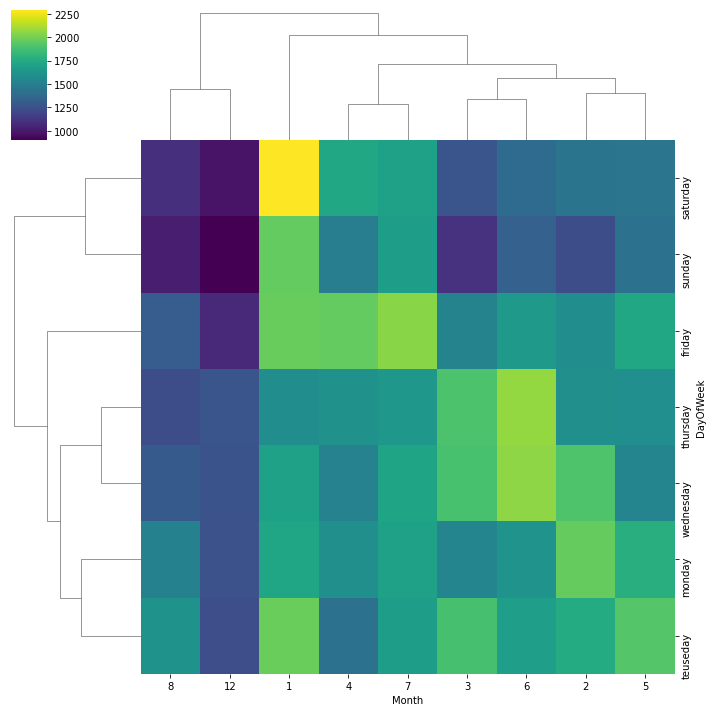

In [388]:
sns.clustermap(daymonth,cmap='viridis')

# Continue exploring the Data however you see fit!
# I Hope you enjoyed doing this project, just like me. :)